### **FIMeval: A Framework for Automatic Evaluation of Flood Inundation Mapping Predictions Evaluation Framework**
The accuracy of the flood inundation mapping (FIM) is critical for model development and disaster preparedness. The evaluation of flood maps from different sources using geospatial platforms can be tedious and requires repeated processing and analysis for each map. These preprocessing steps includes extracting the correct flood extent, assigning the same projection system to all the maps, categorizing the maps as binary flood maps, removal of permanent water bodies etc. This manual data processing is cumbersome and prone to human error. To address these issues, we developed Flood Inundation Mapping Prediction Evaluation Framework (FIMeval), a python-based FIM evaluation framework capable of automatically evaluating flood maps from different sources. FIMeval takes the advantage of comparing multiple target datasets with large benchmark datasets. It includes an option to incorporate permanent waterbodies as non-flood pixels with a user input file or pre-set dataset. In addition to traditional evaluation metrics, it can also compare the number of buildings inundated using a user input file or a pre-set dataset.

<div align="center">
  <img src="images/FC1.png" alt="FC1" width="70%">
</div>



**Install the fimeval package using pip**

In [1]:
 pip install fimeval

Note: you may need to restart the kernel to use updated packages.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 80.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 91.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: jupyterlab-server
    Found existing installation: jupyterlab_server 2.25.1
    Uninstalling jupyterlab_server-2.25.1:
      Successfully uninstalled jupyterlab_server-2.25.1
  Attempting uninstall: jupyterlab
    Found existing installation: jupyterlab 3.6.7
    Uninstalling jupyterlab-3.6.7:
      Successfully uninstalled jupyterlab-3.6.7
  Attempting uninstall: notebook
    Found existing installation: notebook 6.5.4
    Uninstalling notebook-6.5.4:
      Successfully uninstalled notebook-6.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aext-core 0.4.0 requires jupyterlab<4,>=3,

## **Mention all the directories**

**Main_Dir**: This is the **main directory** that stores all the FIM (Flood Inundation Map) files. Users should place both benchmark (**B-FIM**) and model-predicted (**M-FIMs**) in this folder. Ensure that benchmark files include the word "BM" in their filenames.

**Permanent Water Bodies (PWB)**: This directory contains the **permanent water bodies** file used in the evaluation process. For CONUS, the **ESRI USA Detailed Water Bodies** dataset is integrated into the framework (https://hub.arcgis.com/datasets/esri::usa-detailed-water-bodies/about).

**Building Footprint**: This directory holds the **building footprint data**, which is used for evaluating impact based assesment of buildings(https://automaticknowledge.co.uk/us-building-footprints/) 


In [2]:
#Import the packages

import fimeval as fp
from pathlib import Path

## **Import All Input Data**
1. Assign a **main directory** that contains all the Flood Inundation Maps (FIMs), including both **B-FIM** and **M-FIM**.

2. Specify an **output folder** where all generated output files will be saved.

3. Users can provide a **Permanent Water Body** shapefile for the study area by setting the **PWB_dir** path.

4. Define a **projected coordinate system** in which all FIMs should be **reprojected**.For **CONUS** users can provide **EPSG:5070**.

5. Specify the **target resolution** for **resampling** all FIMs. If not provided, the script will automatically detect the **coarsest resolution** among the input FIMs and use it for **resampling**.

6. Users can provide **building footprint shapefile** (.shp or .gpkg) for the **area of interest**. If none is provided, the framework can utilize the **Microsoft Building Footprint** dataset from **Google Earth Engine (GEE)**. To use this option, users must have a valid **GEE account** and **Java** installed on their system.A 3 letter **country ISO Code** need to be assigned. For United States the **country ISO code** is **"USA"**


In [3]:
Main_dir = (
    './Data/FIMs'
)
#PWD_dir = "./path/to/PWB"
# output_dir = "../docs/Output"
output_dir = './Data/FIMs/output'
target_crs = "EPSG:5070" # Target CRS for reprojecting the FIMs, need to be in EPSG code of Projected CRS
target_resolution = 30 #This will be in meters, if it passes the FIMS will be resampled to this resolution else, it will find the coarser resolution among all FIMS for this case and use that to resample!
building_footprint = "./Data/Bldg/building_footprint.gpkg"
# 3 letter country ISO code
#countryISO = "USA"


## **Methods for Flood Domain Extraction**

In this framework three methods of automatic FIM evaluation is available. 

1. **User-defined AOI:** The framework allows the users to input an **Area of Interest (AOI)** in the form of a **polygon shapefile**.The comparisons, statistical evaluations, or error measurements between the two datasets will be performed only within the boundaries specified in the shapefile. Users need to specify the **method_name** as **"AOI"**.

2. **Smallest Extent:** The framework is equipped with an inbuilt algorithm for automatic extraction of the **smallest flood extent**. The algorithm will detect the smallest extent among the B-FIM and M-FIMs. Once the smallest flood extent is determined, then a shapefile will be generated representing this extent, which will be utilized to demarcate the boundaries of B-FIM and M-FIMs. User need to specify the **method_name** as **"smallest_extent"**.

3. **Convex Hull:** The framework incorporates an alternative algorithm that generates the minimum bounding geometry using **Convex Hull**, which can eliminate the limitations of SE. The CH algorithm is used to determine the minimum bounding polygon that encloses a given set of points. The algorithm will convert all the flood pixels of the B-FIM into vector point features. From these features, the convex hull is automatically generated and stored as a polygon shapefile. This polygon vector file serves as the basis for delineating the flood extents for the B-FIM and M-FIMs.Users need to assign **method_name** as **"convex_hull"**.                                                                                                                                                                                                                                                                       
 <div align="center">
  <img src="images/AOI-2.png" alt="AOI-2" width="60%">
</div>
                                                                                                                                           Assign the method_name as per the user specification. If the user is using the method_name as AOI, user need to specify the path of the shapefile.                                                                                                                                    

In [4]:
# If user is working with user defined shapefile
AOI = "./Data/AOI/FIMEvaluatedExtent.shp"

method_name = "smallest_extent"


# **Run the Evaluation using EvaluateFIM module of the framework**
A default **permanent water body** shapefile of ESRI for **CONUS** is integrated in the framework (https://hub.arcgis.com/datasets/esri::usa-detailed-water-bodies/about).
For evaluations within **CONUS**, all FIMs will be automatically reprojected to the coordinate system **EPSG:5070**.
The FIMs will then be **resampled** to match the **coarsest spatial resolution** among the input FIMs to ensure consistency during analysis. The evaluation statistics will be stored in the output_dir as .csv files.The cliped and binary FIMs are also stored in the output_dir.
If the user is using the method_name as **AOI**, then the user has to pass the shapelfile directory of the AOI as following:
fp.EvaluateFIM(Main_dir, method_name, output_dir, shapefile_dir=AOI)


In [5]:
# It has the Permanent Water Bodies (PWB) dataset as default for United States
fp.EvaluateFIM(Main_dir, method_name, output_dir)


Fixing permissions for Data/FIMs...
FIMs are within CONUS, reprojecting all to EPSG:5070 and saving to Data/FIMs/processing
Source raster is already in EPSG:5070. No reprojection needed.
Source raster is already in EPSG:5070. No reprojection needed.
Using coarser resolution: X=10.0, Y=10.0. Resampling all FIMS to this resolution.
---Benchmark: PSS_03m_20161009T150712_0775815W352133N_BM.tif---
---Flood Inundation Evaluation of FIMs---
--- smallest_extent is processing ---
Evaluation metrics saved to ./Data/FIMs/output/FIMs/smallest_extent/EvaluationMetrics/EvaluationMetrics.csv

 {'CSI_values': [0.36562119830665163, 0.36562119830665163], 'TN_values': [4992502, 4992502], 'FP_values': [203565, 203565], 'FN_values': [287651, 287651], 'TP_values': [283110, 283110], 'TPR_values': [0.4960219776754106, 0.4960219776754106], 'FNR_values': [0.5039780223245719, 0.5039780223245719], 'Acc_values': [0.9148204177409125, 0.9148204177409125], 'Prec_values': [0.5817229157034862, 0.5817229157034862], 'sen

**OR, If the Evaluation Study Area is outside the US or, user has their own PWB dataset**


In [ ]:
# fp.EvaluateFIM(Main_dir, method_name, output_dir, PWB_dir=PWD_dir)

 **If the FIMS are not in projected crs or are in different spatial resolution. If target_resolution is not provided in the arguement, it will automatically take the coarsest resolution.**

In [13]:
#fp.EvaluateFIM(Main_dir, method_name, output_dir, target_crs=target_crs, target_resolution=target_resolution)

**Once the FIM evaluation is done, print the contingency map using PrintContingencyMap Module**

The plots of the **categorial FIMs** are stored in the **output_dir** as **.png** format and **.tif** format.

****** Printing Contingency Map for ./Data/FIMs/output/FIMs/smallest_extent/ContingencyMaps/ContingencyMAP_03020201_02_v44_fimslp_20161009_15.tif ******


/opt/anaconda3/envs/fimeval1/lib/python3.13/site-packages/fimeval/ContingencyMap/printcontingency.py:71: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Patch(


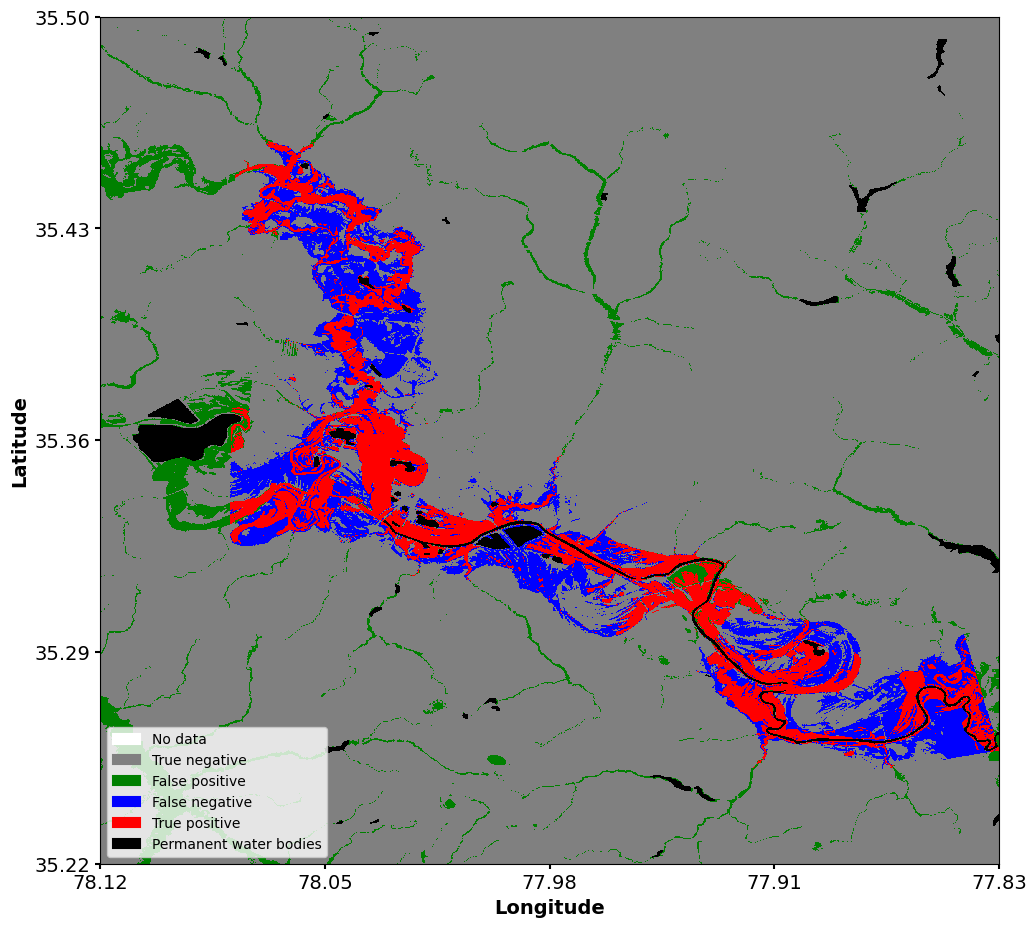

****** Printing Contingency Map for ./Data/FIMs/output/FIMs/smallest_extent/ContingencyMaps/ContingencyMAP_03020201_02_v45_fimslp_20161009_15.tif ******


/opt/anaconda3/envs/fimeval1/lib/python3.13/site-packages/fimeval/ContingencyMap/printcontingency.py:71: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Patch(


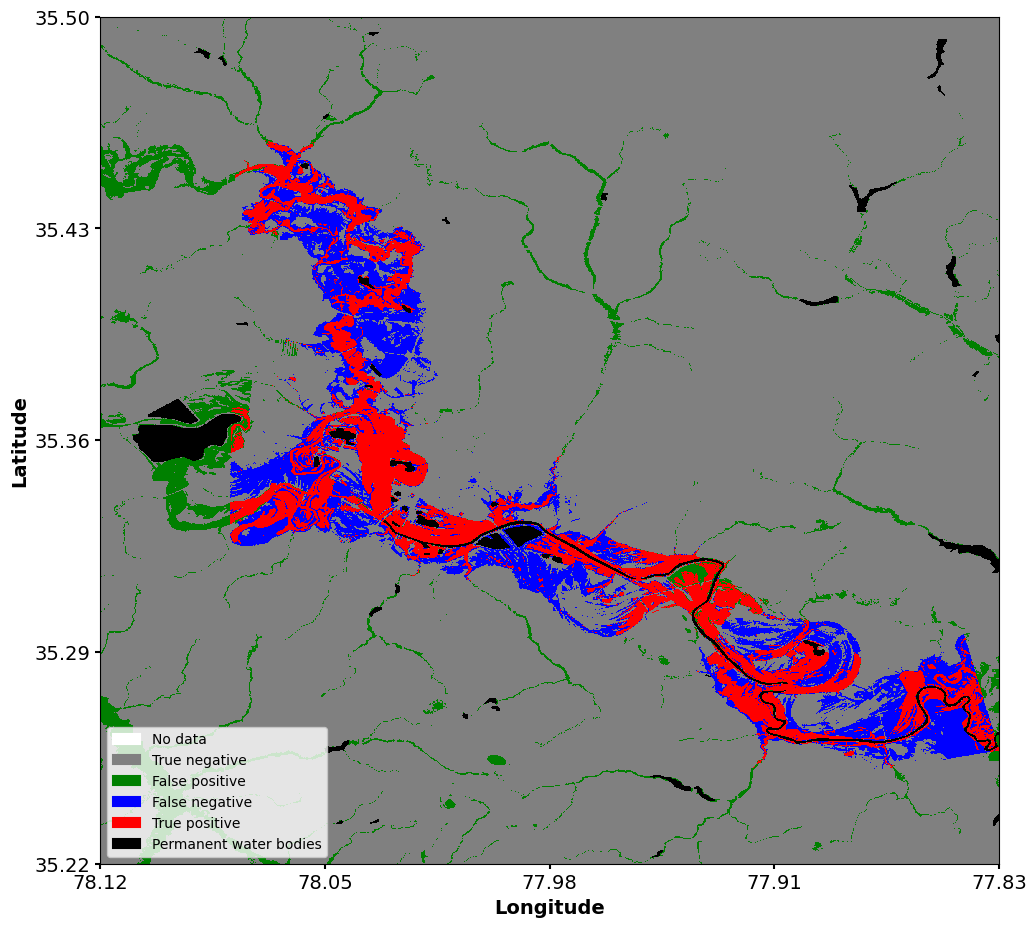

In [6]:
fp.PrintContingencyMap(Main_dir, method_name, output_dir)

**Plot the evaluation statistics using the PlotEvaluationMetrics**

The **evaluation metrics** can be printed and can be stored in the **output_dir** using the module **PlotEvaluationMetrics** in **.png** format.

Performance metrics chart (03020201_02_v44_fimslp_20161009_15) saved as PNG at ./Data/FIMs/output/FIMs/smallest_extent/FinalPlots/EvaluationMetrics_03020201_02_v44_fimslp_20161009_15.png


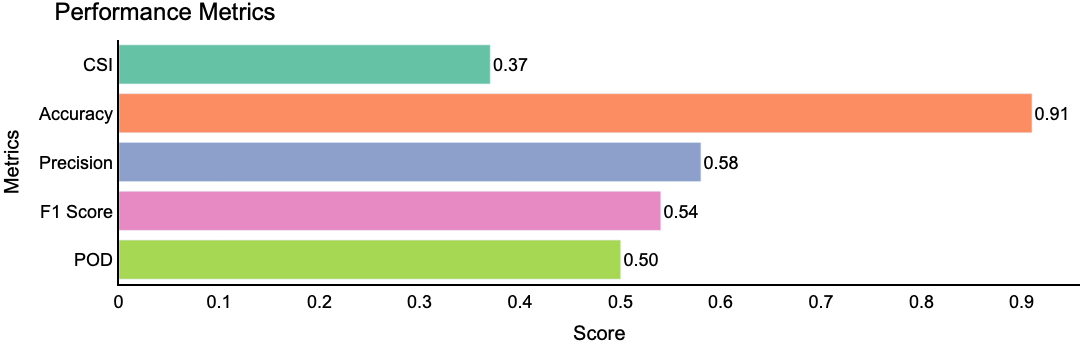

Performance metrics chart (03020201_02_v45_fimslp_20161009_15) saved as PNG at ./Data/FIMs/output/FIMs/smallest_extent/FinalPlots/EvaluationMetrics_03020201_02_v45_fimslp_20161009_15.png


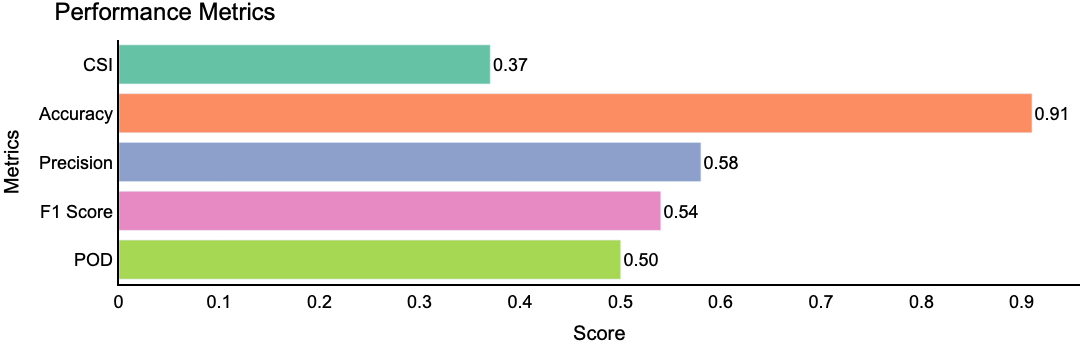

In [7]:
fp.PlotEvaluationMetrics(Main_dir, method_name, output_dir)

# ** Evaluation of FIM using Building Footprint using EvaluationWithBuildingFootprint module ** 

The framework also provides an **impact-based assessment** to assess the **building hit** by FIMs. The analysis can be performed using the **EvaluationWithBuildingFootprint**. If the user has building footprint of the area of interest the following argument can be passed.The building hit statistics are stored in the output_dir.

reproject building_gdf
reproject study_area_gdf


/opt/anaconda3/envs/fimeval1/lib/python3.13/site-packages/geopandas/tools/overlay.py:357: UserWarning:

`keep_geom_type=True` in overlay resulted in 5 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries



Performance metrics chart is saved as PNG at ./Data/FIMs/output/FIMs/smallest_extent/FinalPlots/BuildingCounts_03020201_02_v45_fimslp_20161009_15.png


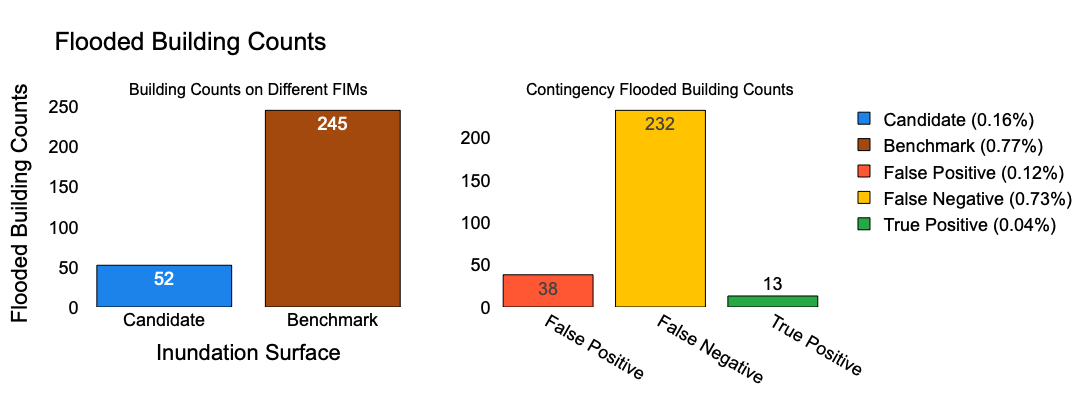

reproject building_gdf
reproject study_area_gdf


/opt/anaconda3/envs/fimeval1/lib/python3.13/site-packages/geopandas/tools/overlay.py:357: UserWarning:

`keep_geom_type=True` in overlay resulted in 5 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries



Performance metrics chart is saved as PNG at ./Data/FIMs/output/FIMs/smallest_extent/FinalPlots/BuildingCounts_03020201_02_v44_fimslp_20161009_15.png


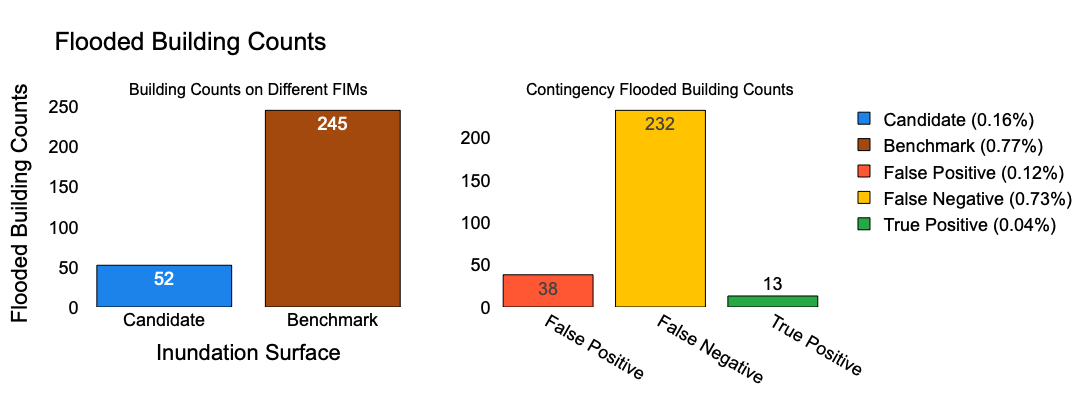

In [8]:
fp.EvaluationWithBuildingFootprint(Main_dir, method_name, output_dir, building_footprint = building_footprint, shapefile_dir=AOI)

 **The framework can also utilise the Microsoft Building from **Google Earth Engine** by default by passing the 3 letter country code**

In [ ]:
#fp.EvaluationWithBuildingFootprint( Main_dir, method_name, output_dir, country="USA")

In [8]:
import ee
ee.Authenticate()
ee.Initialize()

Enter verification code:  4/1AanRRrtH-kde7FlLI0ncL-Bg_65KN1CyX2_kmIhFzoGP1zKJIXCOaj39XGk



Successfully saved authorization token.
